[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
Cost값은 : 6.739695072174072
Cost값은 : 0.3205195665359497
Cost값은 : 0.2772982120513916
Cost값은 : 0.2666107416152954
Cost값은 : 0.2625156342983246
Cost값은 : 0.26050126552581787
Cost값은 : 0.25928375124931335
Cost값은 : 0.25840598344802856
Cost값은 : 0.257683

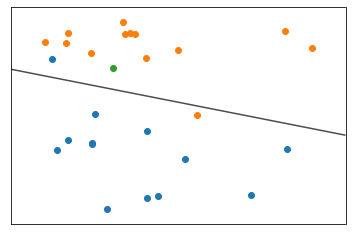

In [19]:
## 시작하기 앞서
## Logistic Regression 을 그림으로 알아보자 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import warnings 
from sklearn.linear_model import LogisticRegression 
import mglearn 

warnings.filterwarnings(action="ignore") # warning 메시지 출력 배제 

x, y = mglearn.datasets.make_forge() #갖고 있는 데이터 중에서 임의의 데이터 구성 

print(x) #array (난수)
print(y) #array (1과0 두가지 뿐)

## 산점도 부터 그려보자(Scatter)
## y값이 0(또는 1)인 x를 추출해서 x의 첫번째 컬럼을 x축으로, x의 두번째 컬럼을 y축으로 scatter를 그려보자 

y == 0 # broad casting으로 비교: boolean mask가 결과로 떨어짐 

blue = x[y == 0]    #공역이 0으로 찍히는 정의역 "blue"  
orange = x[y == 1]  #공역이 1로 찍히는 정의역 "orange"

plt.scatter(blue[:,0], blue[:,1]) # ndarray임으로 유념! 
plt.scatter(orange[:,0], orange[:,1])

########################

## machine learning (Logistic Regression)
## train data set( ※ test data set 은 넘어간다(train만) )
train_x_data = x 
train_y_data = y.reshape([-1,1]) # 이전 y가 1차원 0,1 배열이니 (-1<=y<=1 범위를 갖는)2차원으로 변경 해줌 

# placeholder 
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight, bias 
W = tf.Variable(tf.random_normal([2,1]), name = 'weight') # 내부적으로는 W는 값 두개가 구해짐 
b = tf.Variable(tf.random_normal([1]), name = 'bias') # 절편은 하나 

# Hypothesis 
logit = tf.matmul(X,W) + b # H = WX + b
H = tf.sigmoid(logit) #H바로 쓰지 않고 sigmoid化

# Cost(Loss) Function 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))
# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)
# train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost) #보통 축약해서 쓴다

#session 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습진행
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict = {X: train_x_data,
                                                      Y: train_y_data})
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))

        
# 정확도 측정(Accuracy) : 95% 이상 나오면 쓸만한 모델 (생략)
# Prediction(예측)
result = sess.run(H, feed_dict = {X : [[9,4]]}) #약 0.8
print(result)
plt.scatter(9,4)

model = LogisticRegression()
myModel = model.fit(x,y) #logistic model 학습 
print(myModel.predict([[9,4]])) # 1로 나옴 
mglearn.plots.plot_2d_separator(myModel,x,
                                fill=False,eps=0.5,alpha=0.7) #myModel을 기준으로 분류선 생성
                                                              #산점도는 찍히는 순서대로 파->오->초 순

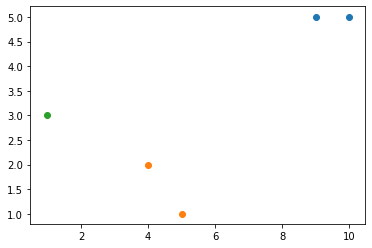

In [21]:
## Logistic multinominal 로 확장해보자
## x쪽 데이터는 시험성적과 출석점수, 
## y쪽 데이터는 학점 
## example1.xlsx 참조
x = np.array([[10,5],
              [9,5],
              [5,1],
              [4,2],
              [1,3]])
y = np.array([["A"],
              ["A"],
              ["B"],
              ["B"],
              ["C"]])
plt.scatter(x[0:2,0],x[0:2,1]) # A학점의 점을 찍어보아요 
plt.scatter(x[2:4,0],x[2:4,1]) # B학점의 점을 찍어보아요 
plt.scatter(x[4,0],x[4,1]) #C학점의 점을 찍어보아요 

In [26]:
import tensorflow as tf 

#train  data set (example2.xlsx 참조) 
train_x_data = [[10,7,8,5],
                [8,8,9,4],
                [7,8,2,3],
                [6,3,9,3],
                [7,5,7,4],
                [3,5,6,2],
                [2,4,3,1]]
train_y_data = [[1,0,0],                #one hot encoding 형태 
                [1,0,0],
                [0,1,0],
                [0,1,0],
                [0,1,0],
                [0,0,1],
                [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight, bias 
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias") #세개의 multinomial이기 때문에 bias 도 3개 필요 

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit) #softmax 처음등장 (sigmoid 대신 probability 등장)

# cost function 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, 
                                                                 labels = Y)) #버전 2로 고르자 
#train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost) 

#session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습 
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={X:train_x_data,
                                                     Y:train_y_data})
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))
        
# Accuracy(정확도)
predict = tf.argmax(H, axis = 1) #출력되는 셋 중 가장 큰 값의 index번호를 리턴 
correct = tf.equal(predict, tf.argmax(Y, axis= 1)) # predict와 correct가 맞으면 좋은 모델(위치를 가지고 비교)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:train_x_data,
                                              Y:train_y_data}))) #테스트 할때도 train데이터
                                                                 #결과도 1과 거의 같음 
#sess.run(H, feed_dict = { X : [[10,8,9,5]] })
                         

Cost값은 : 12.790746688842773
Cost값은 : 1.015552282333374
Cost값은 : 0.683975338935852
Cost값은 : 0.5510250926017761
Cost값은 : 0.502730667591095
Cost값은 : 0.45980969071388245
Cost값은 : 0.054219264537096024
Cost값은 : 0.048886846750974655
Cost값은 : 0.04497601464390755
Cost값은 : 0.041863150894641876
정확도 : 1.0


In [72]:
## 예제 : BMI 지수를 학습해보자!
## BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서 결과 확인 

## 1) by Sklearn 
## sklearn의 LogisticRegression 멀티클래스 중 multinomial 사용, softmax연산시행
from sklearn.linear_model import LogisticRegression 
data_df = pd.read_csv("./data/bmi/bmi.csv", skiprows=3) #세줄 뛰고 받아옴
display(data_df)

X = data_df[['height','weight']]
Y = data_df["label"]
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X,Y)
#학습끝!! 
result = softmax_reg.predict([[183, 72]])

if int(result) == 0:
    print("저체중")
elif int(result) == 1:
    print("표준")
else:
    print("과체중")



,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52
...,...,...,...
19995,0,163,48
19996,2,139,70
19997,1,150,48
19998,1,189,69


표준


In [81]:
## 2) by TensorFlow (단, sklearn MinMaxScaler참조)
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings(action="ignore")

#data loading
data_df = pd.read_csv("./data/bmi/bmi.csv", skiprows=3)

# 결측치 확인 
data_df.isnull().sum(axis=0) #결측이 없다(OK)

# 이상치 확인 
'''
plt.boxplot(data_df["height"]) #이상치가 없다(OK)
plt.boxplot(data_df["weight"]) #이상치가 없다(OK)
'''
# train & test data set + 정규화  
split_num = int(data_df.shape[0] * 0.8)
scaler = MinMaxScaler()
x_data = scaler.fit_transform(data_df[["height", "weight"]])

train_x_data = x_data[:split_num]
test_x_data = x_data[split_num:] #shape는 (16000, 2), 정규화 과정에서 numpy를 slicing 했기 때문  

'''
train_x_data = data_df.loc[:split_num,["height","weight"]] 
scaler = MinMaxScaler()
train_x_data = scaler.fit_transform(train_x_data)
scaler.data_max_
'''
# 학습용, 테스트용 y data를 생성 -> one hot encoding 
# one hot encoding으로 전환시킬 때, 
# pandas.get_dummies()
# tensorflow.one_hot() 둘 중에 하나 보통 사용 

sess = tf.Session() #one_hot()은 tf이므로 세션 시작
'''
tf.one_hot(data_df.loc[:split_num, "label"],3)  #이때 label은 1차원 series(df에서 떨어져나옴)
                                                #3개로 쪼개는 것을 지정 -> 2차원 化
                                                #단, shape이 (16001,3)
'''
#그리하여
train_y_data = sess.run(tf.one_hot(data_df.loc[:split_num-1, "label"],3)) 
test_y_data = sess.run(tf.one_hot(data_df.loc[split_num:, "label"],3)) #이거는 inclusive 
print(test_y_data)


# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight, bias 
W = tf.Variable(tf.random_normal([2,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias") #세개의 multinomial이기 때문에 bias 도 3개 필요 

# Hypothesis 
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit) #softmax 처음등장 (sigmoid 대신 probability 등장)

# cost function 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, 
                                                                 labels = Y)) #버전 2로 고르자 
#train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost) 

#session 초기화 
sess.run(tf.global_variables_initializer())

#학습 
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={X:train_x_data,
                                                     Y:train_y_data})
    if step % 300 == 0:
        print("Cost값은 : {}".format(cost_val))
        


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Cost값은 : 1.3443607091903687
Cost값은 : 0.6374951601028442
Cost값은 : 0.552199125289917
Cost값은 : 0.5001764893531799
Cost값은 : 0.46352702379226685
Cost값은 : 0.435551255941391
Cost값은 : 0.413112610578537
Cost값은 : 0.3945048153400421
Cost값은 : 0.3786999583244324
Cost값은 : 0.3650273382663727


In [84]:
# 매번 학습 돌리는 거 방지를 위해 분리        
# Accuracy(정확도)
predict = tf.argmax(H, axis = 1) #출력되는 셋 중 가장 큰 값의 index번호를 리턴 
correct = tf.equal(predict, tf.argmax(Y, axis= 1)) # predict와 correct가 맞으면 좋은 모델(위치를 가지고 비교)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:test_x_data,
                                              Y:test_y_data}))) #테스트 할때도 train데이터
                                                                 #결과도 1과 거의 같음 

# prediction 
prediction_data = scaler.transform([[183,72]]) #계산 필요 없이 역산 시행 
''' 이하 생략되는 절차  
Ex/ 
tmp1 = (160 - train_df["height"].min()) / (train_df["height"].max() - train_df["height"].min())
tmp2 = (30 - train_df["weight"].min()) / (train_df["weight"].max() - train_df["weight"].min())
result = sess.run(predict,feed_dict={X:[[tmp1,tmp2]]})
'''
result = sess.run(tf.argmax(H,1), 
                  feed_dict = {X : prediction_data})[0] #배열에 있는 첫번째 '값'만 받자 
if result == 0:
    print("THIN")
elif result == 1:
    print("NORMAL")
else:
    print("FAT")

정확도 : 0.9505000114440918
NORMAL


In [85]:
display(pd.get_dummies(data_df['label']))

,0,1,2
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
19995,1,0,0
19996,0,0,1
19997,0,1,0
19998,0,1,0
